
# Sendy Logistic Challenge

Sendy is a logistic company that helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary businesses.Thus, the main aim of the Sendy challenge is to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(import sklearn as we need it.)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Relevant Data

We'll work with the provided Train.csv, Test.csv and Riders.csv file from the challenge. The dats hs infomation about the riders and time taken from pick up to drop-off

* Train.csv
* Test.csv

In [75]:
Traindata = pd.read_csv(r"C:\Users\sibusiso\Desktop\Team_21_JHB_MLR\Train.csv")
Testdata = pd.read_csv(r"C:\Users\sibusiso\Desktop\Team_21_JHB_MLR\Test.csv")

**Check the head of TrainData,TestData and check out its info() and describe() methods.**

In [80]:
Traindata.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [83]:
Testdata.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868


In [84]:
Traindata.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [85]:
Testdata.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [9]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [86]:
Testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null int64
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null int64
Placement - Weekday (Mo = 1)            7068 non-null int64
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null int64
Confirmation - Weekday (Mo = 1)         7068 non-null int64
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null int64
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   7068 n

# Data Preprocessing and Cleaning

**In this section we will drop all unnecessary data, data redundant, missing values.**

* Drop some attributes
* Add missing Values

In [87]:
#Lets first check if attributes in TrainData are all present in TestData

for column in Traindata.columns:
    if column not in Testdata.columns:
        print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [88]:
#All Column that are in TrainData
Traindata.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [89]:
#Drop day of the moth and the Weekday values since they are repeated and assume the delivery happend in the same day.
#Drop Vehicle attribute, since it will not change for this challenge.

Traindata = Traindata.drop(['Vehicle Type','Placement - Day of Month','Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)'], axis = 1)


In [98]:
Traindata.head(2)

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,Business,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [99]:
#All Column that are in TrainData
Testdata.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [100]:
#Drop day of the moth and the Weekday values since they are repeated in all rows and keep only one.
#Drop Vehicle attribute, since it will not change for this challenge.

Testdata = Testdata.drop(columns = ['Vehicle Type','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)'],axis=1)

**Adding missing values in both trainData and TestData.**

In [101]:
#Adding the Missing Values for temperatures and precipitation by the average values in TrainData

Traindata['Temperature'] = Traindata['Temperature'].fillna(Traindata['Temperature'].mean())
Traindata['Precipitation in millimeters'].fillna(Traindata['Precipitation in millimeters'].mean(), inplace=True)


In [102]:
#Adding the Missing Values for temperatures and precipitation by the average values in TrainData

Testdata['Temperature'] = Testdata['Temperature'].fillna(Testdata['Temperature'].mean())
Testdata['Precipitation in millimeters'].fillna(Testdata['Precipitation in millimeters'].mean(),inplace=True)

In [103]:

#TrainData["Temperature"] = TrainData.groupby("Temperature").transform(lambda x: x.fillna(x.mean()))

In [105]:
Traindata.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,Business,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,Business,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,3,Business,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,1,Personal,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [120]:
# Converting time 
import time
import datetime
import calendar

#def time_converter(Traindata):
    for x in Traindata.columns:
        if x.endswith("Time"):
            Traindata[x] = pd.to_datetime(Traindata[x], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return Traindata

#Traindata = time_converter(Traindata)

#Traindata[['Placement - Time', 'Confirmation - Time' , 'Arrival at Pickup - Time', 'Pickup - Time']][3:6]

IndentationError: unexpected indent (<ipython-input-120-2016f7f13967>, line 7)

In [121]:
#def time_converter(Testdata):
    for x in Testdata.columns:
        if x.endswith("Time"):
            Testdata[x] = pd.to_datetime(Testdata[x], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return Testdata

#Testdata = time_converter(Testdata)

#Testdata[['Placement - Time', 'Confirmation - Time' , 'Arrival at Pickup - Time', 'Pickup - Time']][3:6]

IndentationError: unexpected indent (<ipython-input-121-d9f74615272c>, line 2)

In [108]:
Testdata.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,3,Business,16:44:10,16:44:29,16:53:04,17:06:47,8,23.24612,6.651759,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,3,Business,12:57:35,12:59:17,13:20:27,13:25:37,5,23.24612,6.651759,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,3,Business,11:08:14,11:25:05,11:33:20,11:57:54,5,22.80000,6.651759,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,3,Business,13:51:35,13:53:27,14:02:41,14:16:52,5,24.50000,6.651759,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,3,Business,11:30:28,11:34:45,11:47:19,11:56:04,6,24.40000,6.651759,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


## Exploratory Data Analysis

**Let's explore the data**

For the rest of the exercise we'll only be using the numerical data of the csv file.


**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

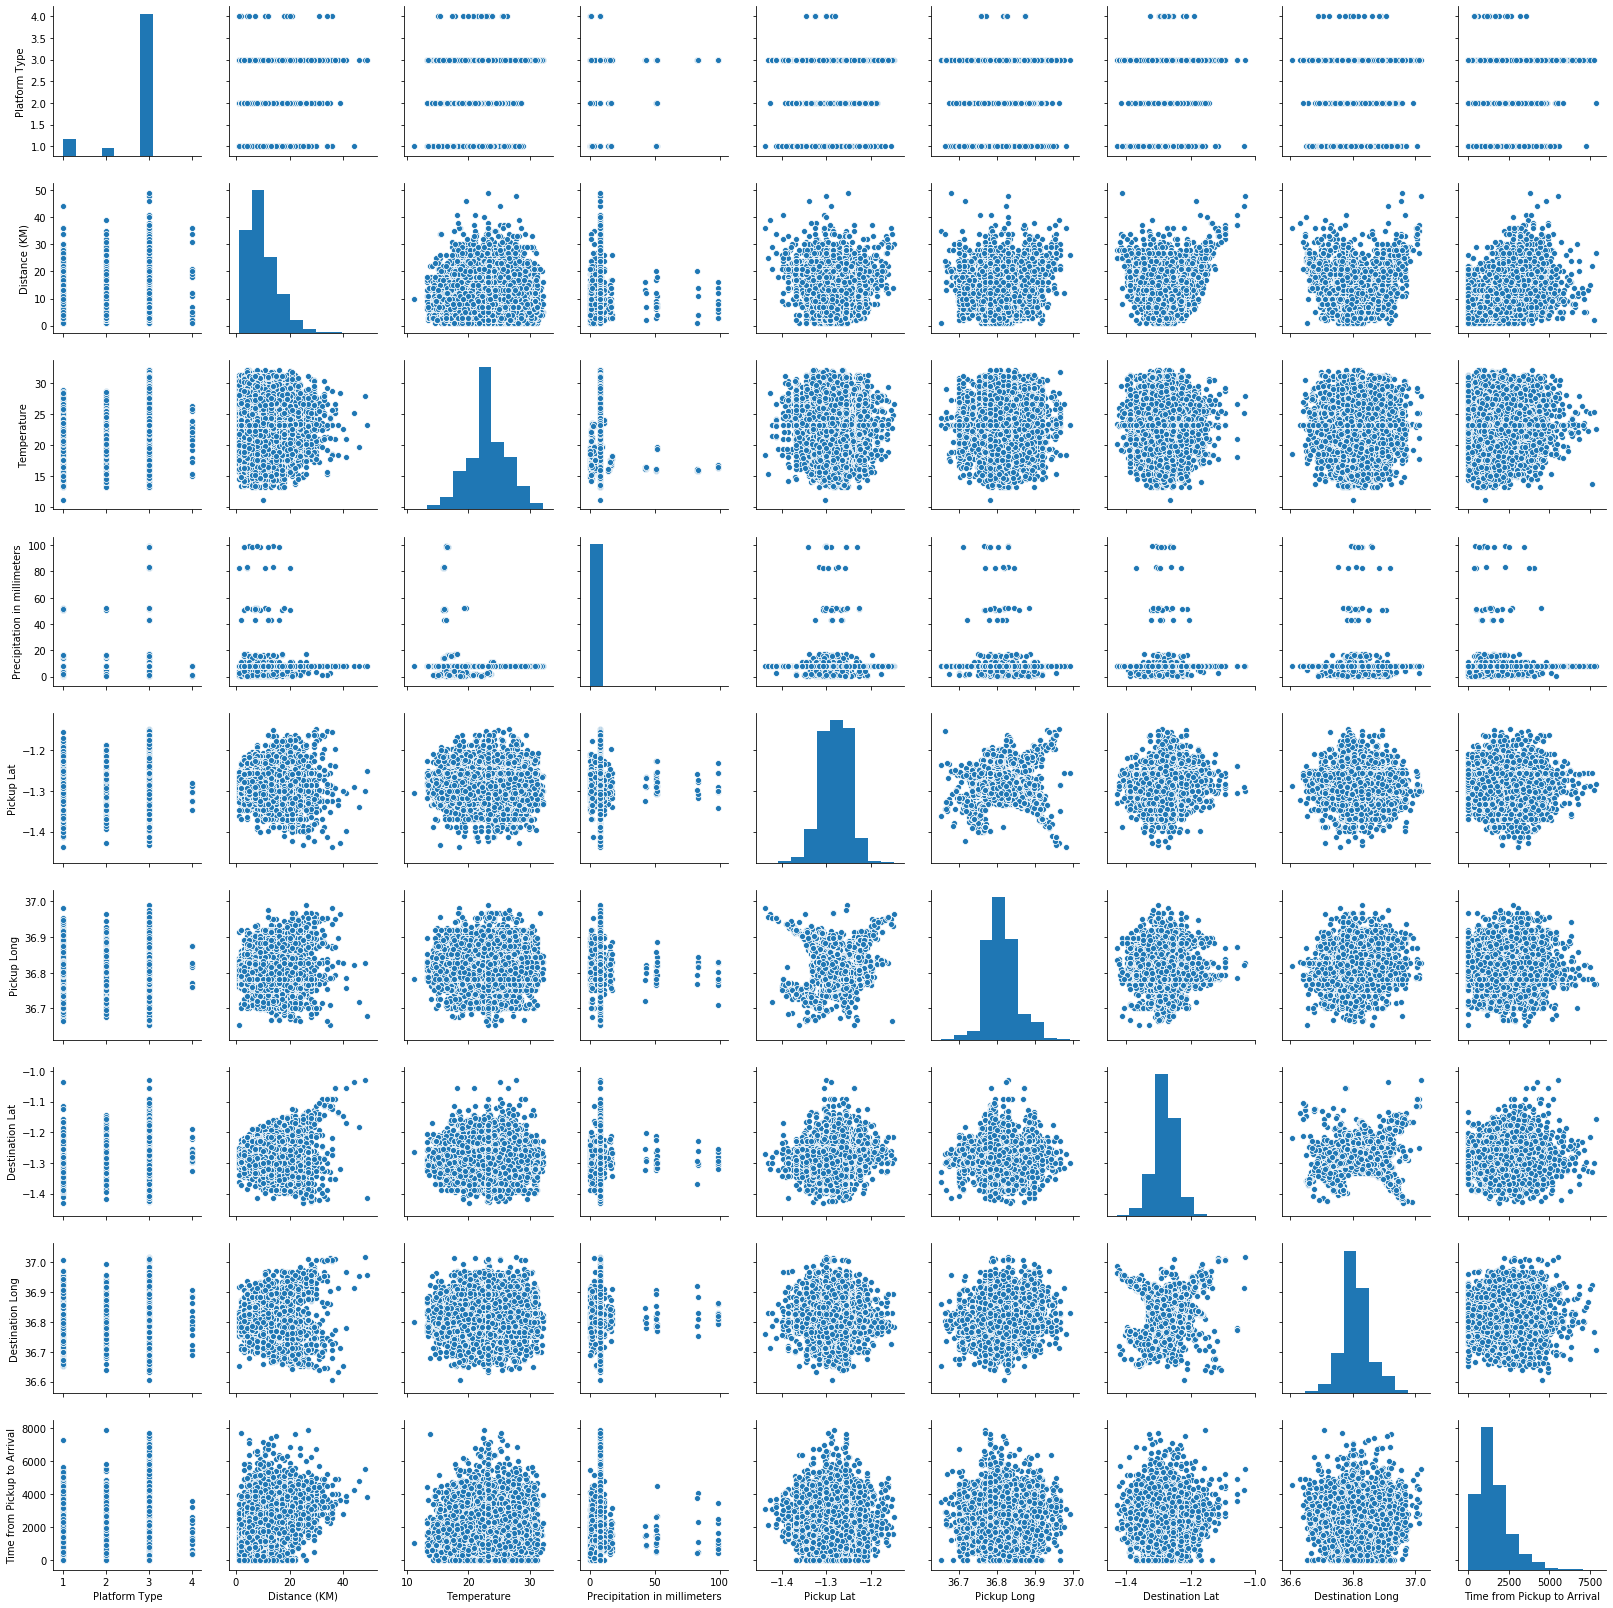

In [109]:
sns.pairplot(Traindata)

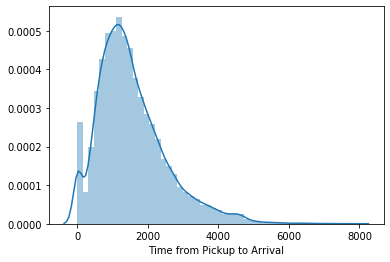

In [110]:
#Checking the distribution of the target column, time from pickup to arrival for a TrainData
sns.distplot(Traindata['Time from Pickup to Arrival'])

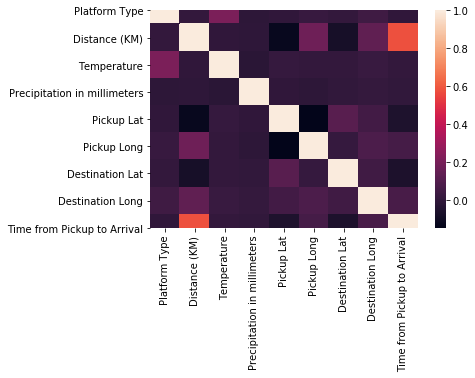

In [111]:
#Checking the correlation of the numerical data in TrainData set
sns.heatmap(Traindata.corr())

## Training and Testing Data using Support Vector Regression (SVR)

Now that we've explored the data a bit, let's go ahead and use the already plit data into training and testing sets.
** Set a variable X equal to the numerical features of the TrainData and a variable y equal to the "Time from Pickup to Arrival" column. **

In [112]:
Traindata.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [113]:
y_train = Traindata['Time from Pickup to Arrival']

In [114]:
X_train = Traindata[['Platform Type', 'Distance (KM)','Temperature', 'Precipitation in millimeters', 'Pickup Lat','Pickup Long', 'Destination Lat', 'Destination Long']]

In [115]:
X_test = Testdata[['Platform Type', 'Distance (KM)','Temperature', 'Precipitation in millimeters', 'Pickup Lat','Pickup Long', 'Destination Lat', 'Destination Long']]

In [116]:
X_test.head(5)

,Platform Type,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,3,8,23.24612,6.651759,-1.333275,36.870815,-1.305249,36.822390
1,3,5,23.24612,6.651759,-1.272639,36.794723,-1.277007,36.823907
2,3,5,22.80000,6.651759,-1.290894,36.822971,-1.276574,36.851365
3,3,5,24.50000,6.651759,-1.290503,36.809646,-1.303382,36.790658
4,3,6,24.40000,6.651759,-1.281081,36.814423,-1.266467,36.792161


## Training the Model

Now its time to train our model on our training data!

** from sklearn.svm import SVR **

In [117]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\sibusiso\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [118]:
y_predict = regressor.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [1]:
#sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [2]:
#coeffecients = pd.DataFrame(lm.coef_,X.columns)
#coeffecients.columns = ['Coeffecient']
#coeffecients